# Gibbs Sampling - Change Point Model

In [4]:
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = 20,10

In [5]:
np.random.seed(13)
# params for synthetic data generation
n = 100
N = 300
l1 = 10
l2 = 50

# data generation
first_sample = np.random.poisson(lam= l1, size=n)
mu_fs = np.repeat(np.mean(first_sample), first_sample.shape[0])

second_sample = np.random.poisson(lam= l2, size=N-n)
mu_ss = np.repeat(np.mean(second_sample), second_sample.shape[0])

# overall sample
overall_sample = np.append(first_sample, second_sample)
mu_overall = np.append(mu_fs,mu_ss)

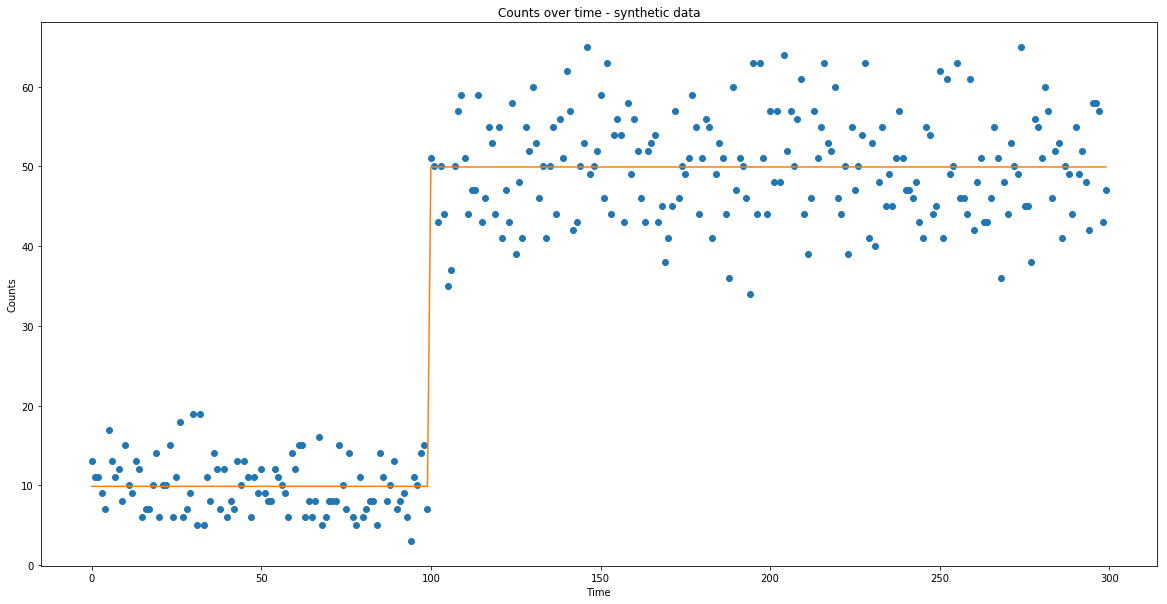

In [6]:
# plot of the data generated
plt.plot(overall_sample,'o')
plt.plot(mu_overall,'-')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.title('Counts over time - synthetic data')
plt.show()

In [7]:
# prior setting
a = 2
b = 1
nGen = np.random.choice(range(1,N+1))

In [8]:
# Gibbs Sampling

flam1 = np.array([0.0]*5500)
flam2 = np.array([0.0]*5500)
fn = np.array([0.0]*5500)

for j in range(5500):

    b1 = 1.0/(nGen + b)
    a1 = a + np.sum(overall_sample[:nGen])
    lam1 = np.random.gamma(a1, b1)

    b2 = 1.0/(N-nGen+b)
    a2 = a + np.sum(overall_sample[nGen:])
    lam2 = np.random.gamma(a2, b2)
    
    # sampling for n
    mult_n = np.array([0]*N)
    for i in range(N):
        mult_n[i] = np.sum(overall_sample[0:i])*np.log(lam1)-i*lam1+ np.sum(overall_sample[i:N])*np.log(lam2)-(N-i)*lam2
    mult_n = np.exp(mult_n - np.max(mult_n))
    nGen = np.where(np.random.multinomial(1,mult_n/np.sum(mult_n),size=1)==1)[1][0]
    
    flam1[j] = lam1
    flam2[j] = lam2
    fn[j] = nGen
    
lam1_mu = np.mean(flam1[500:])
lam2_mu = np.mean(flam2[500:])

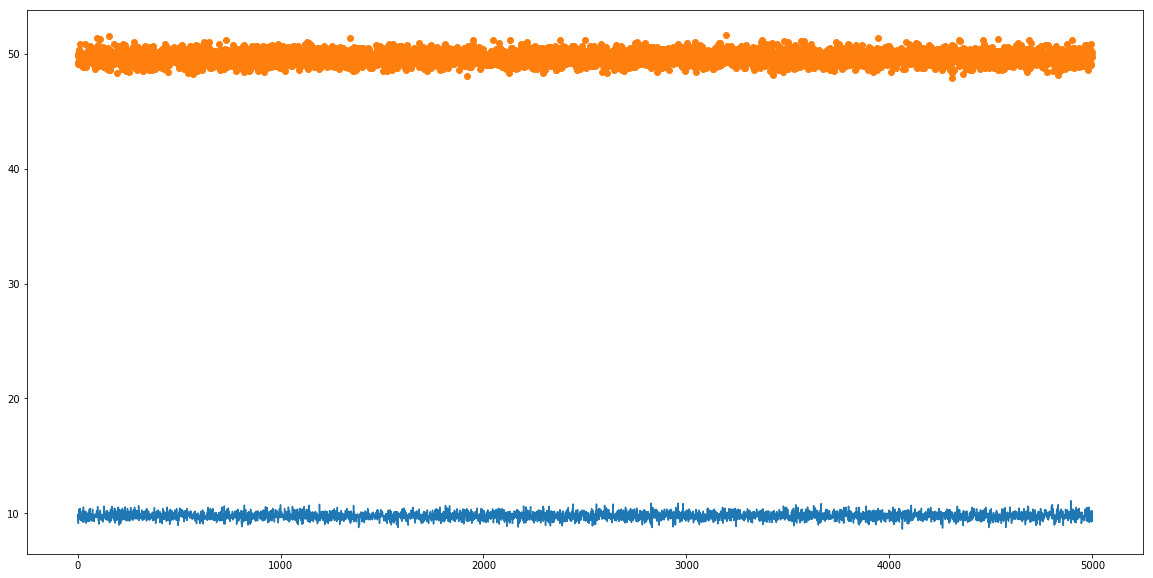

In [9]:
# plotting the posterior samples
plt.plot(flam1[500:],'-')
plt.plot(flam2[500:], 'o')
plt.show()

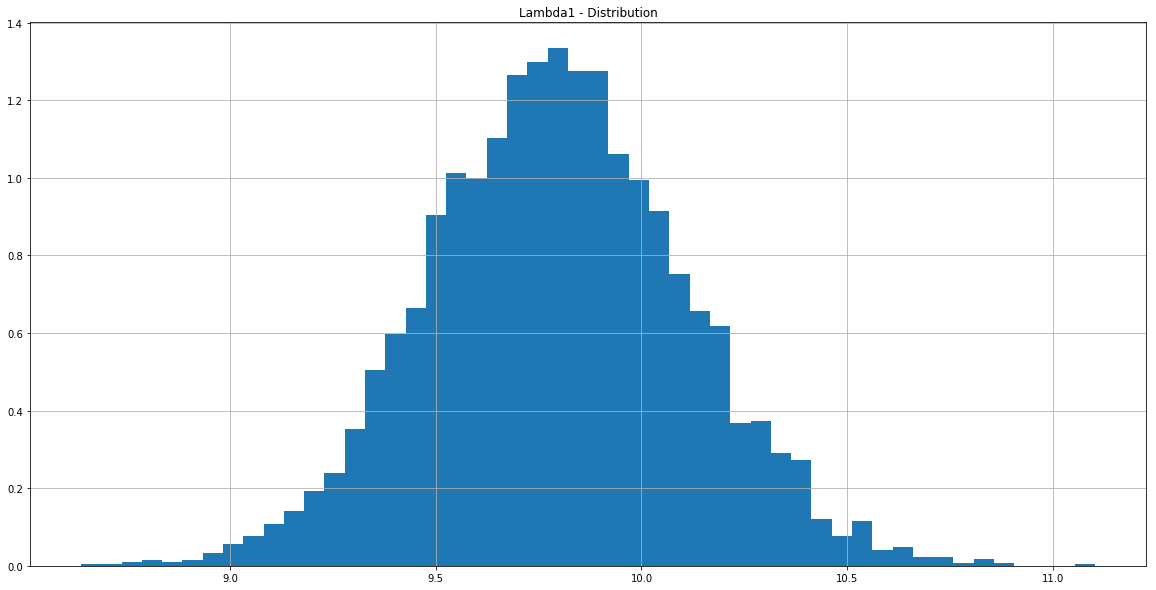

In [21]:
plt.hist(flam1,50,density=True)
plt.title("Lambda1 - Distribution")
plt.grid(True)
plt.show()

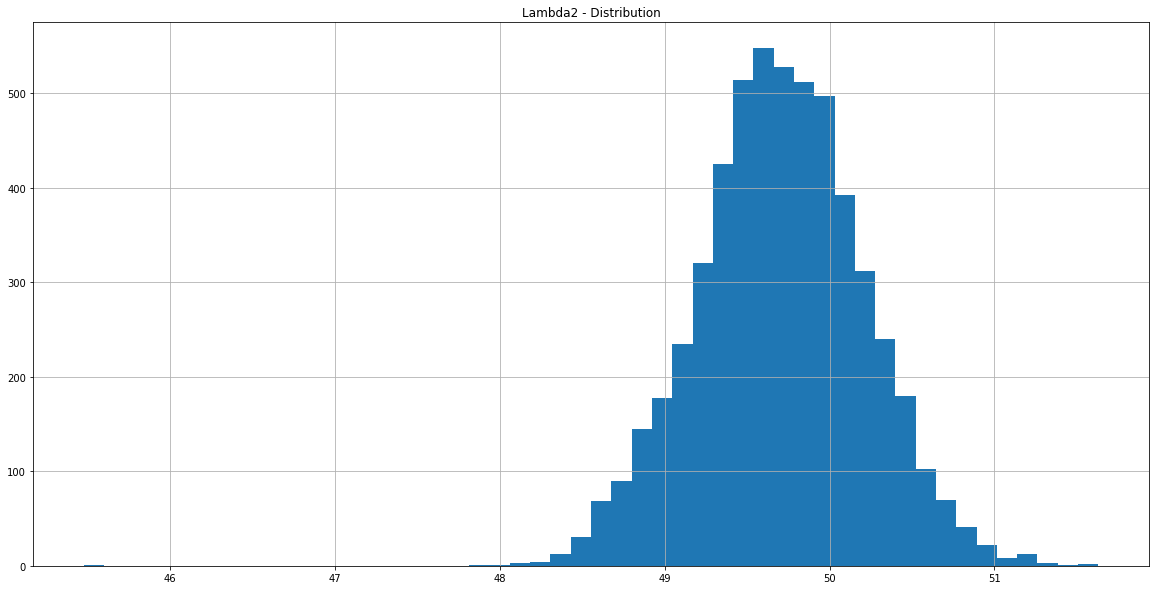

In [22]:
plt.hist(flam2, 50)
plt.title("Lambda2 - Distribution")
plt.grid(True)
plt.show()

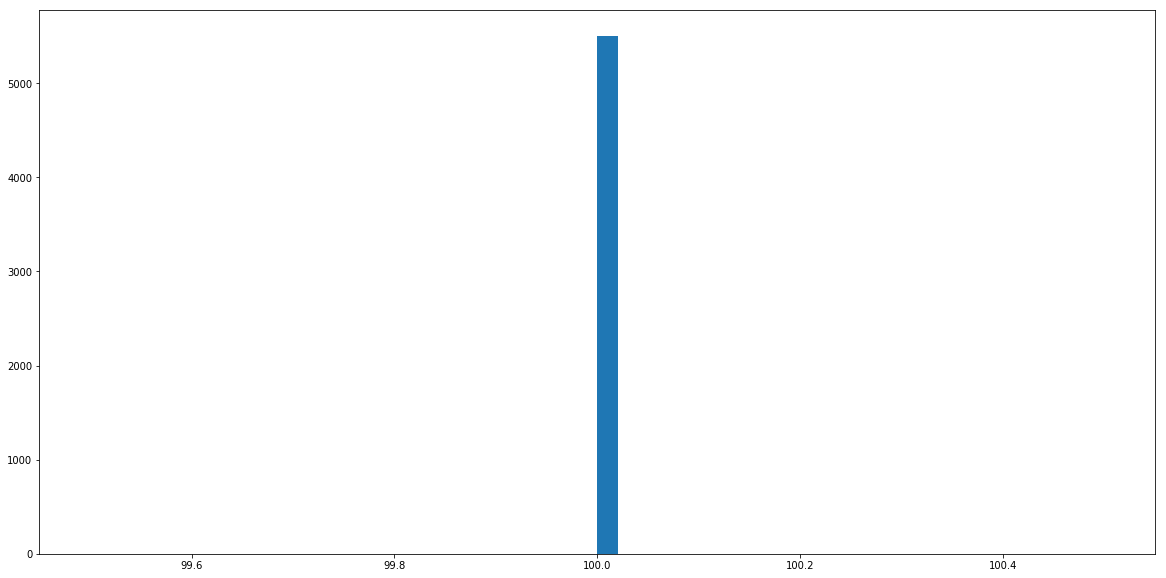

In [23]:
plt.hist(fn,50)
plt.show()